<a href="https://colab.research.google.com/github/jfink09/Deep-Learning/blob/main/Confusion_Matrix_For_Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
# Import libraries

# Libraries for data processing
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

# Libraries for the deep learning model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [118]:
# Check if the code is running on a GPU
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("Number of GPUs available: "+str(len(physical_devices)))

Number of GPUs available: 0


In [ ]:
from os import truncate
# Create an empty array for the training samples and labels
train_samples = []
train_labels = []

# Experiment
# Drug tested on 2100 people ages 13-100.
# 50% over 65 and 50% under 65.
# 95% 65+ had side effects and 95% below 65 did not

for i in range(50):
    # The 5% 13-64 who experienced side effects
    random_younger = randint(13,64)             # Generate random number between 13, 64
    train_samples.append(random_younger)        # Append the random number to the train_samples array
    train_labels.append(1)                      # Append a 1 to trained_labels array to indicate the patient had side effects

    # The 5% 65-100 who did not have side effects
    random_older = randint(65,100)              # Generate random number between 65, 100
    train_samples.append(random_older)          # Append the random number to the train_samples array
    train_labels.append(0)                      # Append a 0 to trained_labels array to indicate they did not have side effects

for i in range(1000):
    # The 95% younger who did not have side effects
    random_younger = randint(13, 64)            # Generate random number between 13, 64
    train_samples.append(random_younger)        # Append the random number to the train_samples array
    train_labels.append(0)                      # Append a 0 to trained_labels array to indicate they did not have side effects

    # The 95% older who did have side effects
    random_older = randint(65, 100)             # Generate random number between 65, 100
    train_samples.append(random_older)          # Append the random number to the train_samples array
    train_labels.append(1)                      # Append a 1 to trained_labels array to indicate they did have side effects

# Print the values added to the trained_samples array
#train_samples = train_samples[0:10]
for i in train_samples:
   print(i)

# Print the values added to the trained_labels array (all 0 and 1)
#train_labels = train_labels[0:10]
for i in train_labels:
    print(i)

# Convert arrays into numpy arrays
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

train_samples, train_labels = shuffle(train_samples,train_labels)         # Randomly shuffle the values in the arrays

scaler = MinMaxScaler(feature_range=(0,1))                                # Rescale our range from 13-100 to 0-1 and fit_transform does not do 1D data so needed to reshape it
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))  # Fit to data by computing the min and max values and transform it 

#scaled_train_samples = scaled_train_samples[0:10]
for i in scaled_train_samples:
    print(i)

In [130]:
# Build the artificial neural network model
model = Sequential([
        Dense(units=16,activation="relu",input_shape=(1,)),
        Dense(units=32,activation="relu"),
        Dense(units=2,activation="softmax")
])

In [131]:
# Show a summary of the model we built
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                32        
                                                                 
 dense_19 (Dense)            (None, 32)                544       
                                                                 
 dense_20 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [132]:
# Compile the artificial neural network
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [133]:
# Train the model using .fit()
# Loss decreases with each epoch and run and accuracy increases with each epoch and run
model.fit(x=scaled_train_samples,y=train_labels,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.7563 - accuracy: 0.4302 - val_loss: 0.7325 - val_accuracy: 0.3524 - 1s/epoch - 7ms/step
Epoch 2/30
189/189 - 1s - loss: 0.7101 - accuracy: 0.2984 - val_loss: 0.6901 - val_accuracy: 0.5429 - 665ms/epoch - 4ms/step
Epoch 3/30
189/189 - 1s - loss: 0.6787 - accuracy: 0.4952 - val_loss: 0.6596 - val_accuracy: 0.5429 - 790ms/epoch - 4ms/step
Epoch 4/30
189/189 - 0s - loss: 0.6541 - accuracy: 0.5243 - val_loss: 0.6363 - val_accuracy: 0.5952 - 401ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.6315 - accuracy: 0.6217 - val_loss: 0.6130 - val_accuracy: 0.6571 - 334ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.6099 - accuracy: 0.6698 - val_loss: 0.5917 - val_accuracy: 0.7048 - 357ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.5859 - accuracy: 0.7169 - val_loss: 0.5676 - val_accuracy: 0.7190 - 356ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.5626 - accuracy: 0.7450 - val_loss: 0.5457 - val_accuracy: 0.7429 - 344ms/epoch - 2ms/step
Epo

In [ ]:
# Neural network prediction with test sets
test_labels = []
test_samples = []

# New experiment data

for i in range(10):
    # The 5% 13-64 who experienced side effects
    random_younger = randint(13,64)             
    test_samples.append(random_younger)        
    test_labels.append(1)                      

    # The 5% 65-100 who did not have side effects
    random_older = randint(65,100)              
    test_samples.append(random_older)          
    test_labels.append(0)                      

for i in range(200):
    # The 95% younger who did not have side effects
    random_younger = randint(13, 64)            
    test_samples.append(random_younger)        
    test_labels.append(0)                      

    # The 95% older who did have side effects
    random_older = randint(65, 100)             
    test_samples.append(random_older)          
    test_labels.append(1)    

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Prediction
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)
#predictions = predictions[0:10]

for i in predictions:
  print(i)

rounded_predictions = np.argmax(predictions,axis=-1)

for i in rounded_predictions:
  print(i)

In [135]:
# Create a confusion matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

Confusion matrix without normalization
[[192  18]
 [ 10 200]]


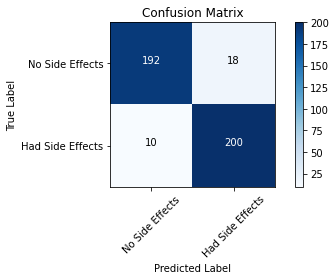

In [136]:
# Confusion matrix plot function (can be found on sklearn's website)
# Can normalize by setting normalize=True
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation="nearest", cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix without normalization")

    print(cm)

    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i,cm[i,j],
               horizontalalignment="center",
               color="white" if cm[i,j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel("True Label")
      plt.xlabel("Predicted Label")

cm_plot_labels = ["No Side Effects","Had Side Effects"]
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title="Confusion Matrix")